# Filling time gaps

This notebook aims at filling in the time gaps (missing data) in the netcdf files by adding data artificially. The objective is to have datasets with no missing timestamps, to be able to have rolling windows in time rather than in indices.

One issue will be that we need regular timestamps to applyl rolling windows, so we will need to either add many intermediate timestamps (PGCD approach), or remove some of the files already existant (PPCM approach).

In [ ]:
# TODO finish this notebook, mettre en ordre
# TODO careful with units

## Imports and functions

In [1]:
%run little_awk_functions.py

## Data definition

In [5]:
day_date = '2022-02-21'
split_day = day_date.split('-')

# if file exists:  # TODO
# file_date = split_day[0] + split_day[1] + split_day[2]

# else:  # TODO
file_date = '20220201'

data_set_used = xr.open_dataset('/home/mabonnet/Desktop/data/Data_netcdf/2022-jan-feb/'+file_date+'.nc')    # TODO use paths instead

# fill_in_missing_times(data_set_used, day_date, '/home/mabonnet/Desktop/data/Data_netcdf/data-filled/')
# fill_in_missing_times_no_ds(data_set_used, day_date, '/home/mabonnet/Desktop/data/Data_netcdf/data-filled/')

## Check the data is well transferred and filled in

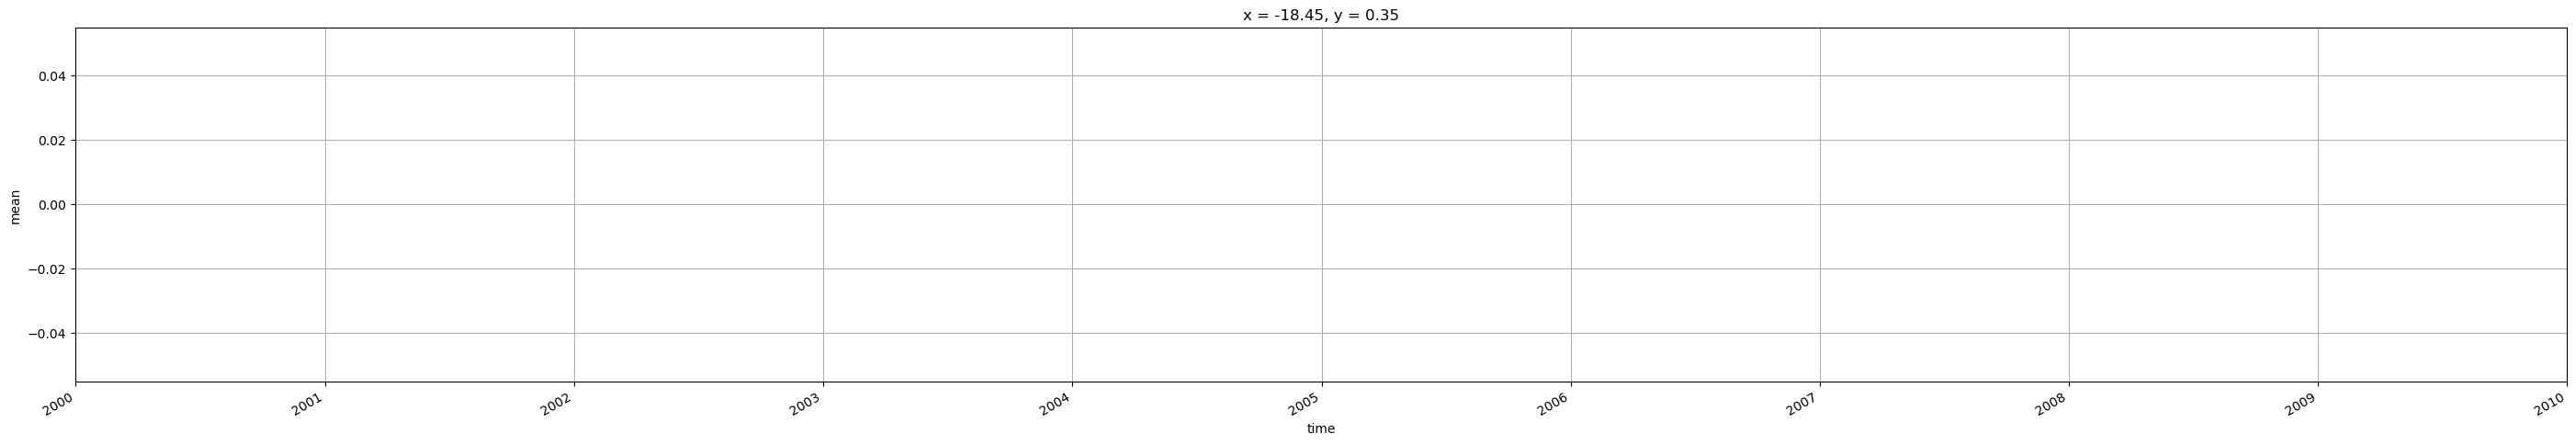

In [6]:
data_set_used_filled = xr.open_dataset('/home/mabonnet/Desktop/data/Data_netcdf/data-filled/'+file_date+'.nc')
data_set_used_filled = data_set_used_filled.ffill(dim='time')

x_sel = 15
y_sel = 42

plt.figure(figsize=(35, 5))

data_set_used.isel(x=x_sel, y=y_sel)['mean'].plot(c='k', alpha=0.2)
data_set_used_filled.isel(x=x_sel, y=y_sel)['mean'].plot(c='m', alpha=0.8, marker='v')
plt.grid()